<a href="https://colab.research.google.com/github/Dheandralf/MachineLearning/blob/main/2ndWeeksTasks/Task2_Logistic_Regression_Dheandra_1103213048.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Dheandra Alfarrelwijaya
NIM : 1103213048
Tugas : 2
Model : Logistic Refression Model
CSV : car.csv
Dokumentasi GPT : https://chat.openai.com/share/f3a99d99-fd7d-43c9-976c-7b90fbf8f1ea

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns




In [43]:
# Untuk mengimpor csv dari google drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
# Membaca data dari file CSV
car = pd.read_csv('/content/drive/MyDrive/dataset/car.csv')

In [45]:
#Untuk mengetahui info kolom csv
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [46]:
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [47]:
car.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


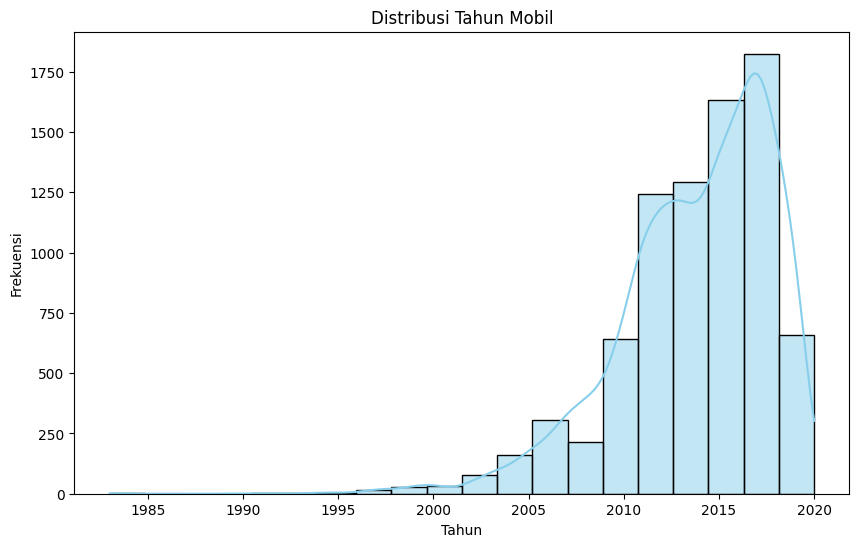

In [48]:
# Histogram dari kolom 'year'
plt.figure(figsize=(10, 6))
sns.histplot(car['year'], bins=20, kde=True, color='skyblue')
plt.title('Distribusi Tahun Mobil')
plt.xlabel('Tahun')
plt.ylabel('Frekuensi')
plt.show()

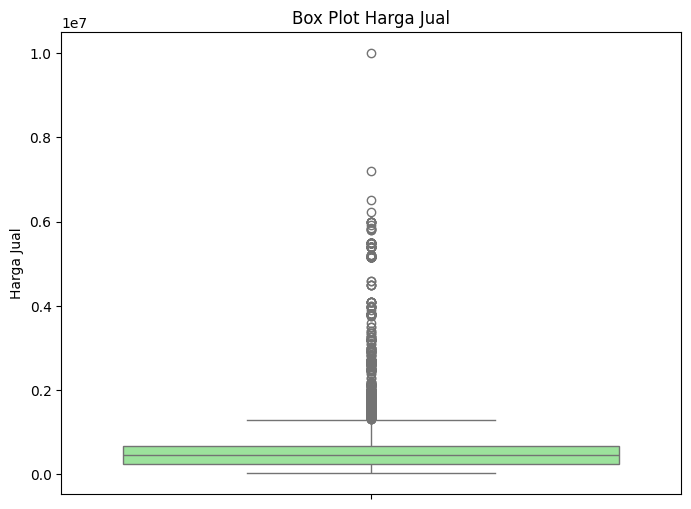

In [49]:
# Box plot untuk kolom 'selling_price'
plt.figure(figsize=(8, 6))
sns.boxplot(y='selling_price', data=car, color='lightgreen')
plt.title('Box Plot Harga Jual')
plt.ylabel('Harga Jual')
plt.show()

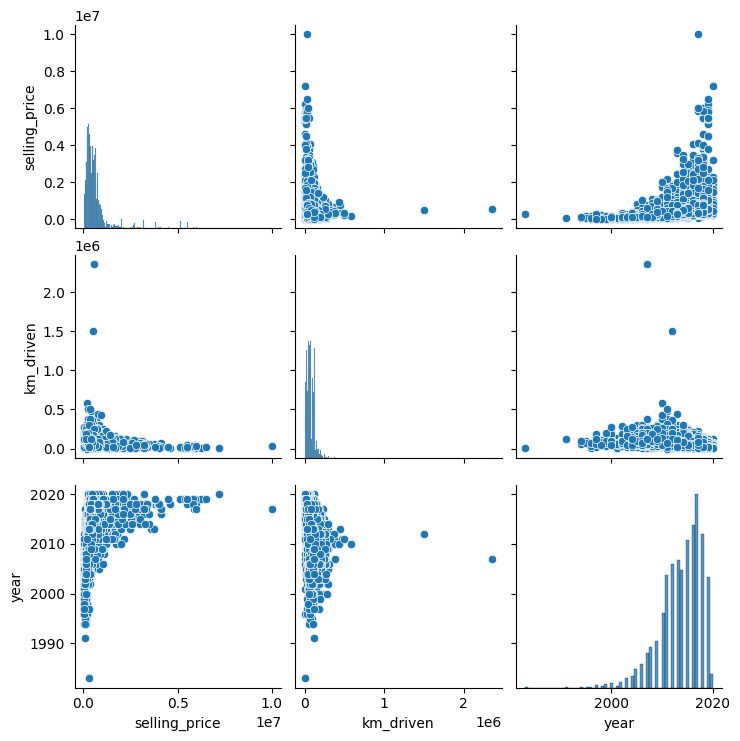

In [50]:
# Pair plot untuk melihat hubungan antara beberapa variabel numerik
sns.pairplot(car[['selling_price', 'km_driven', 'year', 'engine', 'mileage']])
plt.show()

<ipython-input-51-c69576ed6fd5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(car.corr(), annot=True, cmap='coolwarm')


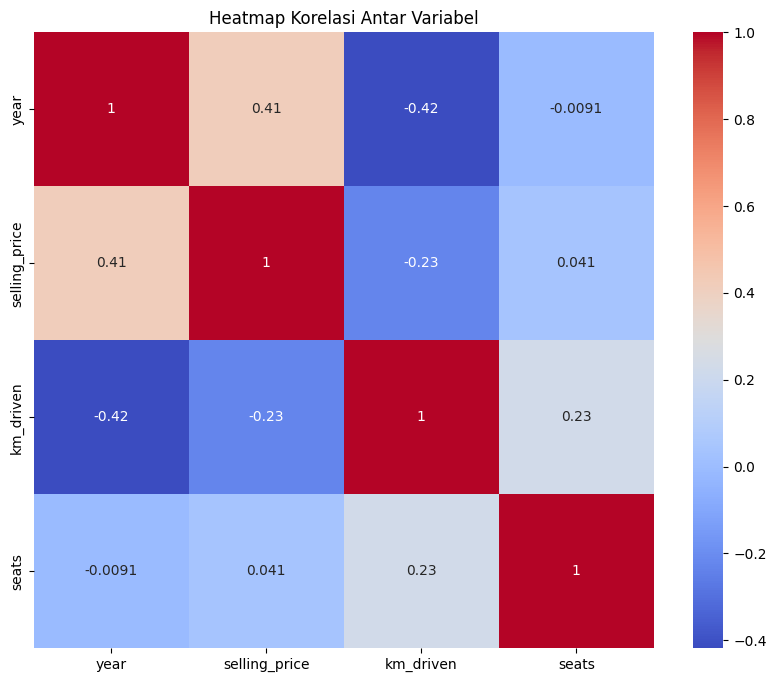

In [51]:
# Heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(car.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()